### 1. Write simple (straightforward) definitions for the following parameters for RandomForestClassifier and indicate how they correlate with the precision and recall for the basic diabetes model we built in class.

In [1]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [2]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [7]:
rf = RandomForestClassifier(random_state = 42) # running it with default parameters first
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = rf.predict(X_test)

In [19]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("--------------------------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.749
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       150
           1       0.68      0.54      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



#### Explore Number of Trees

Number of trees denote the number of decision trees we populate the forest with

In [3]:
from numpy import mean
from numpy import arange
from numpy import std
from numpy import linspace
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

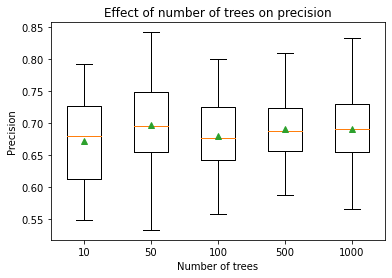

In [27]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators = n, random_state=42)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of number of trees on precision')
plt.xlabel('Number of trees')
plt.ylabel('Precision')
plt.show()

##### The precision increases till a certain point if we increase the number of trees, the optimum being around 50 trees

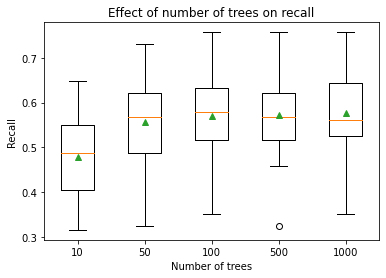

In [28]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of number of trees on recall')
plt.xlabel('Number of trees')
plt.ylabel('Recall')
plt.show()

##### The recall also improves as we increase the number of trees, but the effect levels off at around 100 trees.

#### Effect of max_depth

Maximal depth denotes the maximal allowed distance (in number of splits) from the top to bottom of each tree.

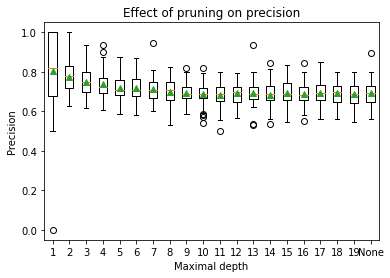

In [31]:
def get_models():
    models = dict()
    # consider tree depths from 1 to 7 and None=full
    depths = [i for i in range(1,20)] + [None]
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of pruning on precision')
plt.xlabel('Maximal depth')
plt.ylabel('Precision')
plt.show()

##### The precision slightly decreases as we allow more depth. To be honest it is not entirely clear why it would be so...

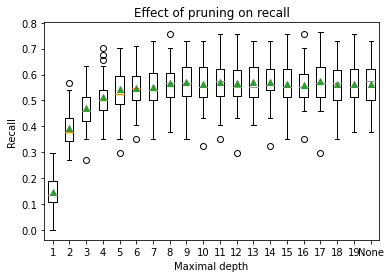

In [32]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train)
    # store the results
    results.append(scores)
    names.append(name)

# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of pruning on recall')
plt.xlabel('Maximal depth')
plt.ylabel('Recall')
plt.show()

##### Increasing the maximal depth increases recall untill it levels off around the value of 10.

#### Effect of min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between at least one sample at each node to all of the samples at each node. Increasing this parameter each tree in the forest becomes more constrained as it has to consider more samples at each node.

In [13]:
def get_models():
    models = dict()
    min_samples_splits = linspace(0.1, 1.0, 10, endpoint=True)
    for split in min_samples_splits:
        models[str(round(split, 2))] = RandomForestClassifier(min_samples_split = split, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

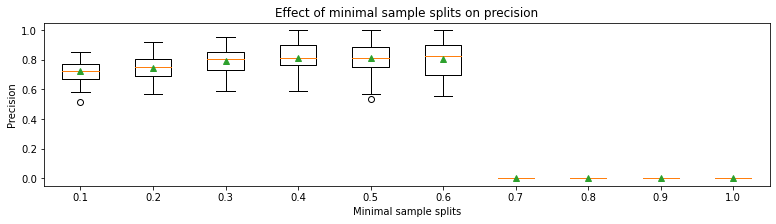

In [14]:
# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal sample splits on precision')
plt.xlabel('Minimal sample splits')
plt.ylabel('Precision')
plt.show()

##### Precision increases slightly when increasing the minimal samples per split to 60%, after which it decreases sharply (above this we allow only one single split per tree)

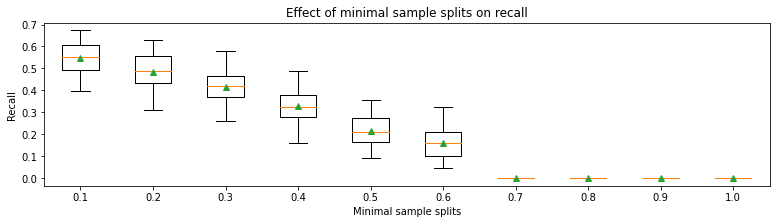

In [15]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal sample splits on recall')
plt.xlabel('Minimal sample splits')
plt.ylabel('Recall')
plt.show()

##### Recall decreases monotonically as we increase the amount of samples in a node necessary to consider a split.

#### Effect of min_samples_leaf

Denotes the number of samples that must be present at least in every leaf of the tree.

In [12]:
def get_models():
    models = dict()
    min_samples_leaf = linspace(0.05, 0.5, 11, endpoint=True)    
    for sample in min_samples_leaf:
        models[str(round(sample, 2))] = RandomForestClassifier(min_samples_leaf = sample, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

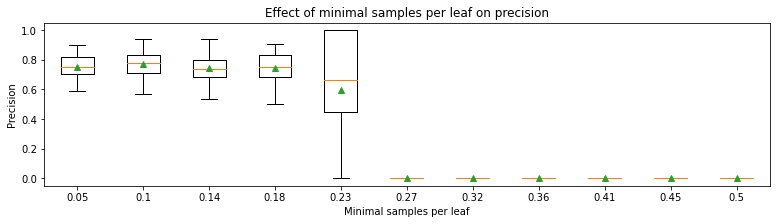

In [13]:
# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal samples per leaf on precision')
plt.xlabel('Minimal samples per leaf')
plt.ylabel('Precision')
plt.show()

##### Precision does not change as we increase the minimal samples per leaves up to 20%, after which it drops suddenly.

In [14]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

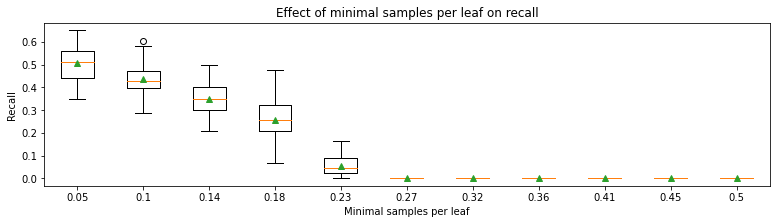

In [15]:
# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal samples per leaf on recall')
plt.xlabel('Minimal samples per leaf')
plt.ylabel('Recall')
plt.show()

##### Recall decreases as we increase the minimal samples per leaf.

#### Effect of min_weight_fraction_leaf

Similar to min sample leafs, but uses fractions instead

In [16]:
def get_models():
    models = dict()
    min_weight_fraction_leaf = linspace(0.05, 0.5, 11, endpoint=True)
    for fraction in min_weight_fraction_leaf:
        models[str(round(fraction, 2))] = RandomForestClassifier(min_weight_fraction_leaf = fraction, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

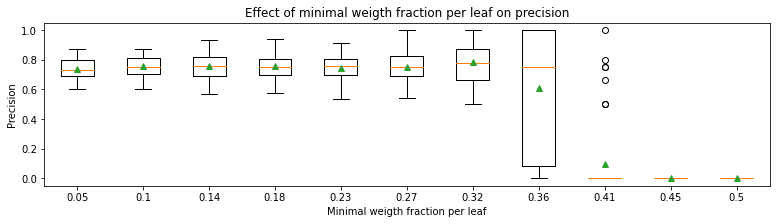

In [17]:
# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal weigth fraction per leaf on precision')
plt.xlabel('Minimal weigth fraction per leaf')
plt.ylabel('Precision')
plt.show()

In [18]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

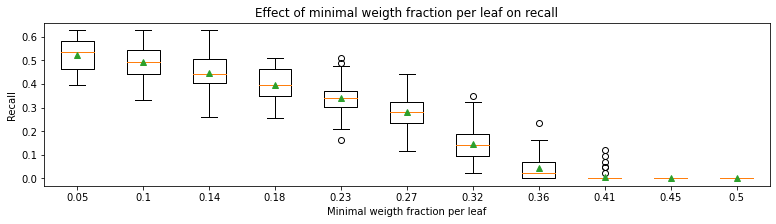

In [19]:
# plot model performance for comparison
plt.figure(figsize=(13, 3))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal weigth fraction per leaf on recall')
plt.xlabel('Minimal weigth fraction per leaf')
plt.ylabel('Recall')
plt.show()

##### Both for precision and recall the effect is the same as for the minimal samples per leaf, only the cutoff shifts a bit to higher ration.

#### Effect of max_leaf_nodes

Sets the maximal allowed number of terminal nodes (summed for all branches of the tree).

In [21]:
def get_models():
    models = dict()
    max_leaf_nodes = [3*i for i in range(1, 20)]
    for nodes in max_leaf_nodes:
        models[str(nodes)] = RandomForestClassifier(max_leaf_nodes = nodes, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

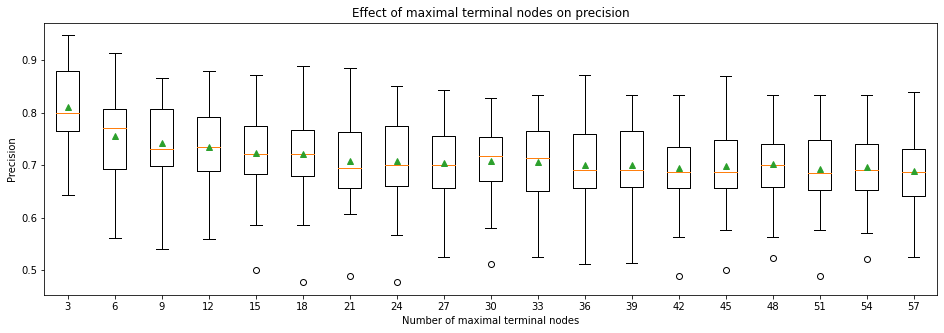

In [22]:
# plot model performance for comparison
plt.figure(figsize=(16, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of maximal terminal nodes on precision')
plt.xlabel('Number of maximal terminal nodes')
plt.ylabel('Precision')
plt.show()

##### The number of maximal nodes does not have a clear effect on precision.

In [23]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

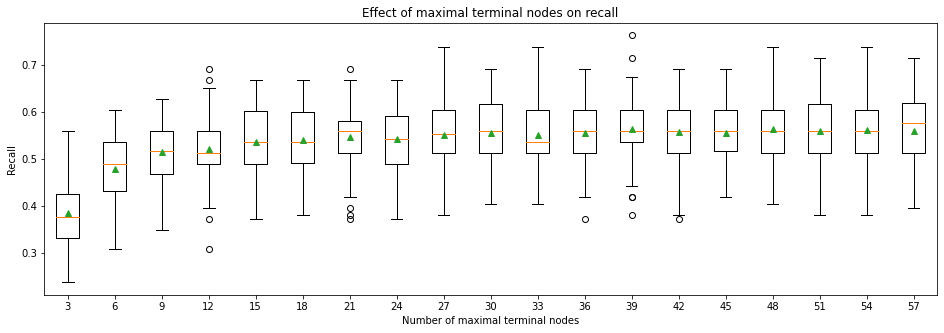

In [24]:
# plot model performance for comparison
plt.figure(figsize=(16, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of maximal terminal nodes on recall')
plt.xlabel('Number of maximal terminal nodes')
plt.ylabel('Recall')
plt.show()

##### At the same time recall increases with increasing number of terminal nodes and reaches saturation around 20 nodes.

#### Effect of min_impurity_decrease

#### Calculation of impurity decrease

Take the impurity of the right side of the split and weight it by the percentage of samples in the right split from the node.

Take the impurity of the left side of the split and weight it by the percentage of samples in the left split from the node.

Subtract both of those from the node impurity.

Weight that amount by the percentage of samples in the node compared to the total number of samples.

In [27]:
def get_models():
    models = dict()
    min_impurity_decrease = linspace(0.01, 0.2, 21, endpoint = True)
    for decrease in min_impurity_decrease:
        models[str(round(decrease, 2))] = RandomForestClassifier(min_impurity_decrease = decrease, random_state=42)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

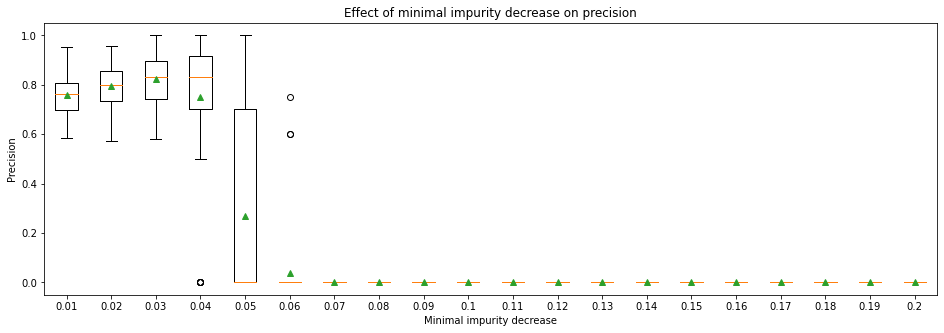

In [28]:
# plot model performance for comparison
plt.figure(figsize=(16, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal impurity decrease on precision')
plt.xlabel('Minimal impurity decrease')
plt.ylabel('Precision')
plt.show()

##### Precision increases if we increase minimal impurity decrease, but it starts to decrease around 0.03 and cuts off to 0 around 0.07.

In [29]:
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X_train, y_train) # X_train and y_train are randomized, so I prefer to use over original data
    # store the results
    results.append(scores)
    names.append(name)

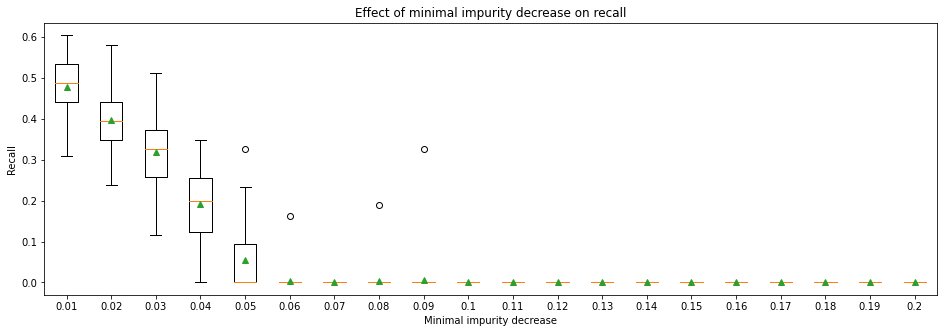

In [30]:
# plot model performance for comparison
plt.figure(figsize=(16, 5))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Effect of minimal impurity decrease on recall')
plt.xlabel('Minimal impurity decrease')
plt.ylabel('Recall')
plt.show()

##### Increasing the minimal impurity decrease necessary decreases recall monotonically.

#### Effect of min_impurity_split

Min impurity split is deprecated and has been replaced by min impurity decrease...

### 2. How does setting bootstrap=False influence the model performance? Note: the default is bootstrap=True. Explain why your results might be so.

In [32]:
rf = RandomForestClassifier(bootstrap = False, random_state = 42) # running it with default parameters first
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("--------------------------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.747
--------------------------------------------------
Classification report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



Both recall and precision decreased slightly, which is not surprising in view that the whole dataset is used for every tree, making the trees less divergent